In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np
import os
from average_dTb import average_dTb, dTb_random_v_stream

In [2]:
# param_fits = test([0.5, 29000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)
# np.savetxt("param_fits.txt", param_fits)
# test([0.15, 33000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)

In [3]:
for m_chi in np.logspace(-2, 0, 3):
    for V_rms in np.linspace(29000-10000, 29000+10000, 3):
        param_fits = test([m_chi, V_rms], cores=1, repeat=50, plot=False, average_dir = '.', delete_if_exists=False)

param_true = [0.01, 19000.0]
200 random v_streams will be generated for m_chi = 0.01 GeV and V_rms = 19000.0 m/s...
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
200 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.04 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
200 random v_streams will be generated for m_chi = 0.11000000000000001 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.05 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
200 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 31900.0 m/s...
1 CPU working...
It costs 0.04 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
200 random

50 points; m,V=(1.0, 1.25), (39000, 29502.89)
50 points; m,V=(0.01, 0.00), (19000, 28923.95)
50 points; m,V=(0.1, 0.07), (19000, 28999.76)
50 points; m,V=(0.1, 0.10), (29000, 28969.41)
50 points; m,V=(0.01, 0.01), (29000, 29049.90)
50 points; m,V=(1.0, 0.66), (19000, 29835.71)
50 points; m,V=(0.1, 0.19), (39000, 28994.79)
50 points; m,V=(1.0, 0.93), (29000, 30049.24)
50 points; m,V=(0.01, 0.05), (39000, 28999.91)


Text(0, 0.5, '$V_{\\rm rms}$ [km/s]')

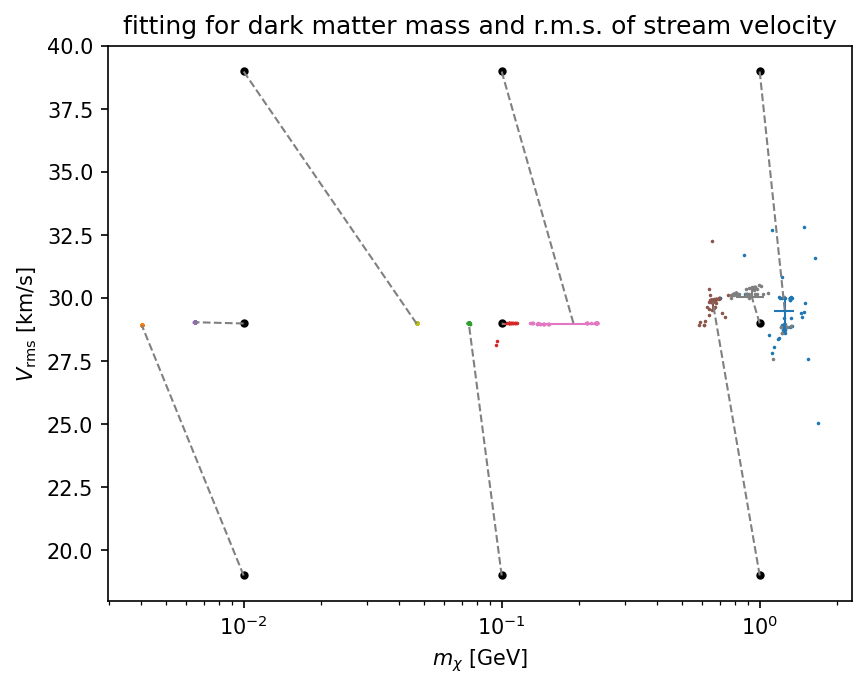

In [4]:
plt.figure(dpi=150)
N_point = 0
for filename in os.listdir("."):
    if filename[-4:] == ".npy":
        data = np.load(filename, mmap_mode='r')
        m_chi_averaged = np.average(data.T[0])
        V_rms_averaged = np.average(data.T[1])
        m_chi_real = float(filename[5:9])
        V_rms_real = float(filename[-9:-4])
        # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
        print(f"{data.shape[0]} points; "+f"m,V=({m_chi_real}, {m_chi_averaged:.2f}), "+f"({int(V_rms_real)}, {V_rms_averaged:.2f})")
        plt.scatter(data.T[0], data.T[1]/1000, s=0.5)
        plt.scatter(m_chi_real, V_rms_real/1000, marker=".", c='k')
        # plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="v", c='g')
        xerr = np.percentile(data.T[0], [15.9,84.1])
        yerr = np.percentile(data.T[1], [15.9,84.1])
        xerr = abs(xerr-m_chi_averaged)
        yerr = abs(yerr-V_rms_averaged)
        # xerr = np.std(data.T[0])
        # yerr = np.std(data.T[1])
        # print("xerr =", xerr, "yerr =", yerr)
        plt.errorbar(m_chi_averaged, V_rms_averaged/1000, xerr=np.array([xerr]).T, yerr=np.array([yerr]).T/1000, linewidth=1)
        plt.plot([m_chi_real, m_chi_averaged], [V_rms_real/1000, V_rms_averaged/1000], linewidth=1, linestyle='--', c='grey')
        N_point += 1
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("fitting for dark matter mass and r.m.s. of stream velocity")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.xscale('log')
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
# plt.legend()
# plt.savefig(f"100Vrms_{N_point}P_fitting_log")

In [5]:
def compare(m_list, v_list):
    plt.figure(dpi=150)
    for m_chi in m_list:
        for V_rms in v_list:
            z, dTb, m, V = average_dTb(m_chi=m_chi, V_rms=V_rms, more_random_v_streams=200, cores=1, verbose=False)
            # print('dTb =', dTb)
            plt.plot(z, dTb, label=f"{m} GeV, {V} m/s")
    plt.xlim(0,300)
    # plt.ylim()
    plt.legend()
    plt.show()

1 CPU working...
It costs 0.09 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.06 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.06 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.07 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


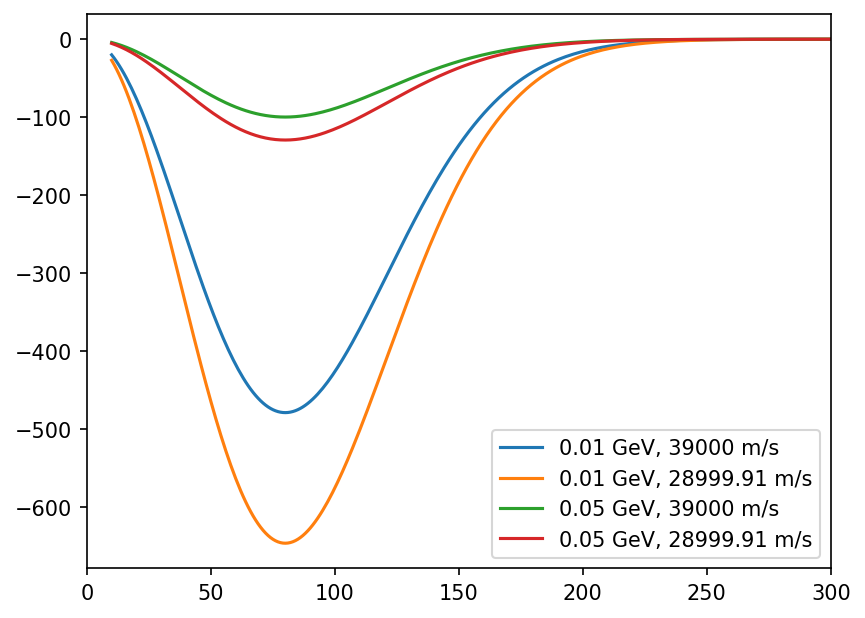

In [19]:
compare((0.01, 0.05), (39000, 28999.91))

1 CPU working...
It costs 0.11 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.07 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.06 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.08 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


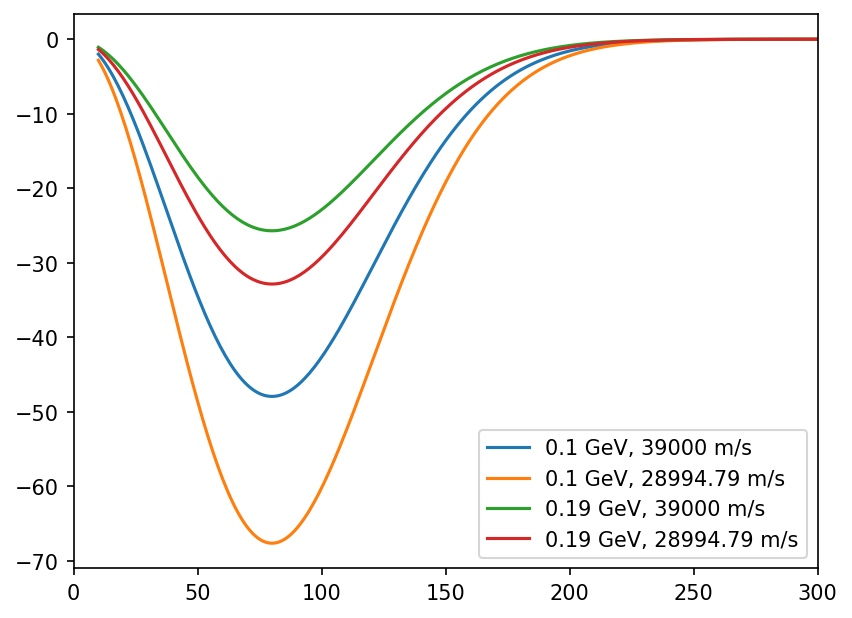

In [13]:
compare((0.1, 0.19), (39000, 28994.79))

1 CPU working...
It costs 0.08 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.10 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.05 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.07 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


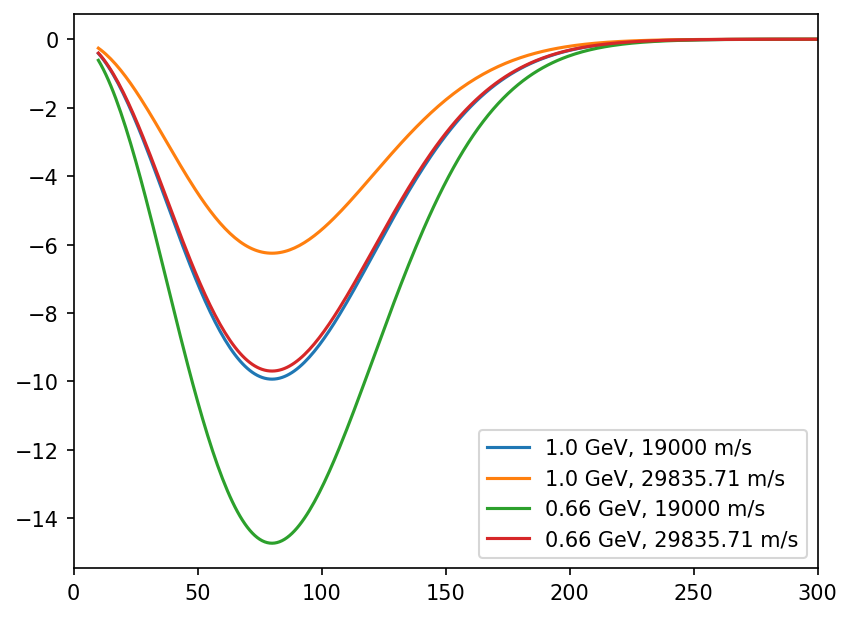

In [14]:
compare((1.0, 0.66), (19000, 29835.71))

In [ ]:
for m_chi in [0.01, 0.05]:
    for V_rms in [39000, 34613.20]:
        z, dTb, m, V = average_dTb(m_chi=m_chi, V_rms=V_rms, more_random_v_streams=200, cores=-1, verbose=False)
        plt.plot(z, dTb, label=f"{m} GeV, {V} m/s")

plt.xlim(0,300)
plt.ylim()
plt.legend()
plt.show()

In [ ]:
average_dTb(m_chi=1, V_rms=19000, more_random_v_streams=10, cores=-1, verbose=False)

In [ ]:
# param_fits = np.loadtxt('m_chi0.10_V_rms29000_12:23:27.txt')
param_fits = np.load("m_chi{}_V_rms{}.npy", mmap_mode='r')
print(param_fits)

m_chi_fit, V_rms_fit = param_fits.T

plt.figure(dpi=150)
plt.hist2d(m_chi_fit, V_rms_fit, density=True)
plt.colorbar()
plt.plot(0.05, 29000, marker='*', c='r', label=r"$m_{\chi, \rm real} = $")
plt.title(r"distribution of fitting values for $m_{\chi}$ and $V_{\rm rms}$")
plt.xlabel("dark matter mass [GeV]")
plt.ylabel("r.m.s. of stream velocity [m/s]")
plt.legend()
# plt.xlim(0,0.5)
# plt.ylim(25000, 32500)
plt.savefig("hist2d")
plt.show()

In [ ]:
ls /storage/home/hcoda1/3/bxia34/scratch

In [ ]:
ls /storage/home/hcoda1/3/bxia34/scratch/average_dTb/V_rms29531/m_chi0.06

# 降低V_rms的分辨率
# 单独输出每次预测点的坐标，添加是否更新文件的参数

In [ ]:
from average_dTb import average_dTb

In [ ]:
ls average_dTb/V_rms29000/m_chi0.10/ | wc -l

In [ ]:
from fit_param import demonstrate

In [ ]:
pwd

In [ ]:
demonstrate()

In [ ]:
data = np.random.normal(size=500)

In [ ]:
N_max = 500
def average_data(data, N=np.arange(1,N_max,1)):
    averaged_data = [np.average(data[:n]) for n in N]
    plt.plot(averaged_data, c='r')
    plt.scatter(np.arange(0,np.size(data)), data, s=1, c='k')
    plt.xlabel("N")
    plt.ylabel("averaged_data")
    plt.axhline(y=0, xmin=0, xmax=1)
    plt.show()

In [ ]:
average_data(data[:N_max])

In [ ]:
from average_dTb import average_dTb
V_rms_list = [29000-10,29000+10]
for V_rms in V_rms_list:
    print("working on", V_rms)
    average_dTb(m_chi=0.10, V_rms=V_rms, cores=-1, more_random_v_streams=200, verbose=False)

In [ ]:
# V_rms_list = [28900, 29000, 29100]
V_rms_list.append(29000)
data = np.array([np.load("average_dTb/V_rms{}/m_chi0.10_averaged.npy".format(V_rms)) for V_rms in V_rms_list])

plt.figure(dpi=200)
for i in np.arange(data.shape[0]):
    plt.plot(data[i][0], data[i][1], label="V_rms = {} m/s".format(V_rms_list[i]), linewidth=1)
# plt.xlim(50,200)
plt.xlim(0,300)
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=200)
for filename in ["m_chi0.10_V_rms29000.npy","m_chi0.05_V_rms29000.npy","m_chi0.10_V_rms25000.npy"]:
    data = np.load(filename, mmap_mode='r')
    m_chi_averaged = np.average(data.T[0])
    V_rms_averaged = np.average(data.T[1])
    m_chi_real = float(filename[5:9])
    V_rms_real = float(filename[-9:-4])
    # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
    plt.scatter(data.T[0], data.T[1]/1000, s=0.1, label=f"N={data.shape[0]}, $m_\chi$={m_chi_real}GeV, "+r"$V_{\rm rms}$"+f"={int(V_rms_real/1000)}km/s")
    plt.scatter(m_chi_real, V_rms_real/1000, marker="*", c='r')
    plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="*", c='g')
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("predictions vs real values")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
plt.legend()
plt.show()